<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE-255-Clustering-Techniques/blob/main/Clustering_Techniques_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring various Clustering Techniques

 K Means Clustering - Implementing manual algorithm

K Means is an unsupervised clustering algotrithm that clusters the points based on the centroid. It works  in 2 steps. Expectation and maximization. Expectation step is predicting or assuming the centers of clusters and then assigning the points that are nearest to the cluster center.

Maximization then reevaluates the center of each cluster to assign the points again. K means works by using the number of clusters as an input from the user. One of the other drawbacks is that it can only work with linear boundries. It is not able to recognize complex cluster boundrues and often fails to provide a precise cluster for such data. 

To demonstrate clustering using K means we will be using the digits dataset from sci-kit learn. It contains the digits represented as points. The expectation is that K means will cluster the points together so we can visually see and recognize the digits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [30]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

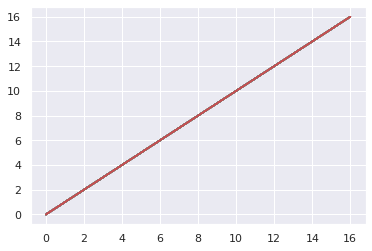

In [14]:
plt.plot(digits.images.reshape(1797,64),digits.data)

Coding the K means algorithm.

In [2]:
from sklearn.metrics import pairwise_distances_argmin

In [16]:
rstate = 2

In [18]:
def kmeans_cluster(X, k):
    #randomly choosing initial k clusters.
    rng = np.random.RandomState(rstate)
    i = rng.permutation(X.shape[0])[:k]
    centers = X[i]
    
    while True:
        #finding distances between clusters center and each point. Assigning the labels based on distance. 
        # This is the estimation step
        labels = pairwise_distances_argmin(X, centers)
        
        #Finding the New cluster center after adding the points. This is the Maximization step
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(k)])
        
        # The algorithm stops when there are no changes to the cluster. This is convergence. It can also be stopped based on the number of interations.
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

Implementing K means clustering to the data set. In our case we know we have 10 digits. So the outcome should be 10 clusters. Hence K =10

In [26]:
centers, labels = kmeans_cluster(digits.data, 10)

In [28]:
labels.shape

(1797,)

In [31]:
centers = centers.reshape(10,8,8)

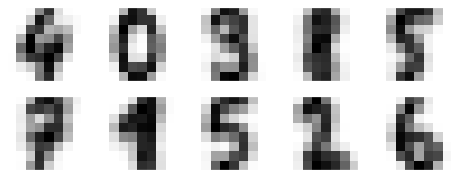

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Let us try the same with the scikit learn library.


In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

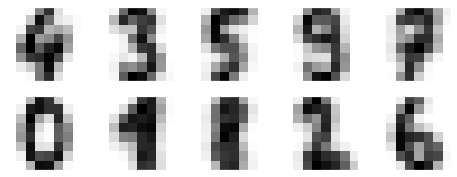

In [35]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We are going to comapre the predicted labels to the actual labels from the digit data set. To achive this first we make sure that we are using the right permutation as K means does not have any information on the organization of labels.

In [36]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

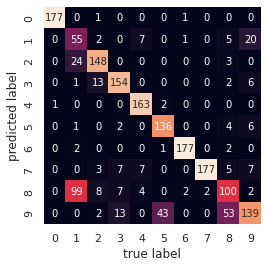

In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

We can see that it has some trouble clustering the numbers 8 and 5. This could be because that the bounderies are more geometrical than linear. We can use spectral clustering to solve this issue. But we are not implementing it as it is performing sifficiently for the outcome of this notebook.